Selling Price Range: (5000, 760000)
Median Selling Price: 45000.0
Most Common Seller Type: Individual
Bikes driven more than 50,000 kilometers: 170
Average km_driven by ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64
Proportion of bikes from 2015 or older: 0.5664467483506126
Missing values trend:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
Highest ex_showroom_price recorded:
name                 Harley-Davidson Street Bob
ex_showroom_price                     1278000.0
Name: 134, dtype: object
Bikes listed by seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


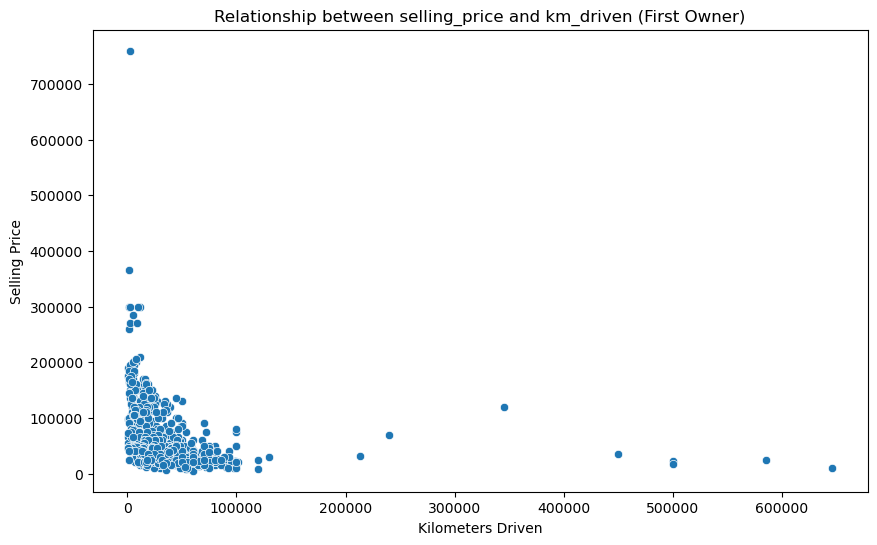

Removed outliers from 39 rows in km_driven.


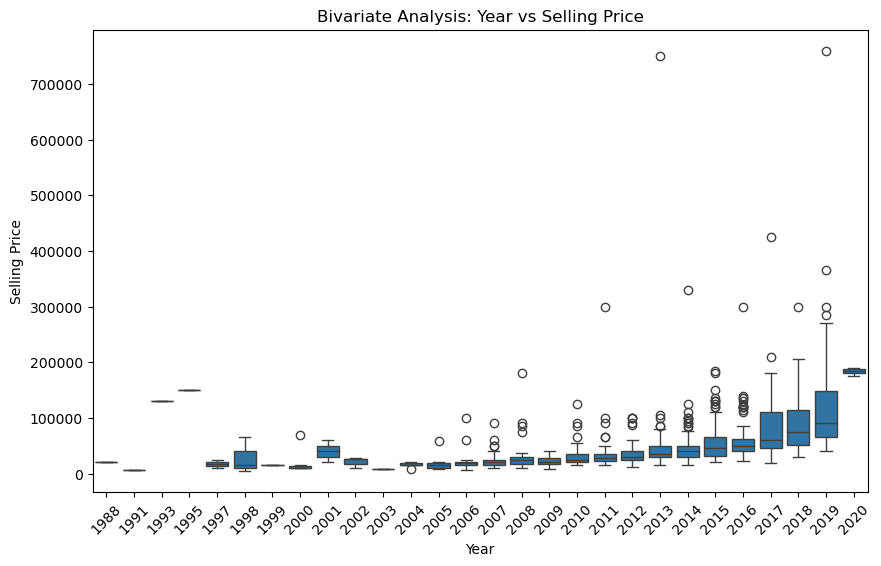

Average depreciation in selling price by bike's age:
age
4     183333.333333
5     119689.511628
6      87660.374046
7      78894.736842
8      58469.018692
9      56500.000000
10     48668.131868
11     51136.986301
12     35748.400000
13     35655.721311
14     31793.333333
15     22267.857143
16     34289.285714
17     24927.586207
18     23380.000000
19     16978.571429
20     15100.000000
21      8000.000000
22     20666.666667
23     40000.000000
24     20833.333333
25     15000.000000
26     28333.333333
27     17500.000000
29    150000.000000
31    130000.000000
33      6000.000000
36     20000.000000
Name: selling_price, dtype: float64
Bikes priced significantly above the average for their year:
                                      name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000
7     Royal Enfield Bullet 350

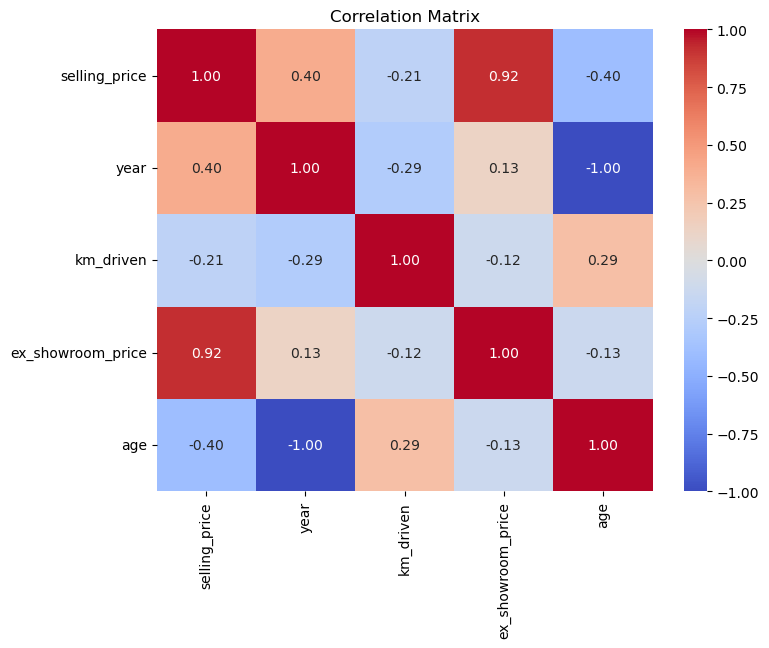

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:\\Users\\Harsh Arora\\Downloads\\BIKE DETAILS.csv"
df = pd.read_csv(file_path)

# 1. What is the range of selling prices in the dataset?
selling_price_range = (df['selling_price'].min(), df['selling_price'].max())
print("Selling Price Range:", selling_price_range)

# 2. What is the median selling price for bikes in the dataset?
median_selling_price = df['selling_price'].median()
print("Median Selling Price:", median_selling_price)

# 3. What is the most common seller type?
most_common_seller_type = df['seller_type'].mode()[0]
print("Most Common Seller Type:", most_common_seller_type)

# 4. How many bikes have driven more than 50,000 kilometers?
bikes_over_50k = df[df['km_driven'] > 50000].shape[0]
print("Bikes driven more than 50,000 kilometers:", bikes_over_50k)

# 5. What is the average km_driven value for each ownership type?
average_km_per_owner = df.groupby('owner')['km_driven'].mean()
print("Average km_driven by ownership type:")
print(average_km_per_owner)

# 6. What proportion of bikes are from the year 2015 or older?
bikes_2015_or_older = df[df['year'] <= 2015].shape[0]
proportion_2015_or_older = bikes_2015_or_older / df.shape[0]
print("Proportion of bikes from 2015 or older:", proportion_2015_or_older)

# 7. What is the trend of missing values across the dataset?
missing_values = df.isnull().sum()
print("Missing values trend:")
print(missing_values)

# 8. What is the highest ex_showroom_price recorded, and for which bike?
highest_ex_showroom = df.loc[df['ex_showroom_price'].idxmax()]
print("Highest ex_showroom_price recorded:")
print(highest_ex_showroom[['name', 'ex_showroom_price']])

# 9. What is the total number of bikes listed by each seller type?
bikes_per_seller = df['seller_type'].value_counts()
print("Bikes listed by seller type:")
print(bikes_per_seller)

# 10. What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_bikes = df[df['owner'] == '1st owner']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price')
plt.title("Relationship between selling_price and km_driven (First Owner)")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.show()

# 11. Identify and remove outliers in the km_driven column using the IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print(f"Removed outliers from {df.shape[0] - df_no_outliers.shape[0]} rows in km_driven.")

# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='selling_price')
plt.title("Bivariate Analysis: Year vs Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.xticks(rotation=45)
plt.show()

# 13. What is the average depreciation in selling price based on the bike's age?
current_year = 2024  # Update to the current year
df['age'] = current_year - df['year']
average_depreciation = df.groupby('age')['selling_price'].mean()
print("Average depreciation in selling price by bike's age:")
print(average_depreciation)

# 14. Which bike names are priced significantly above the average price for their manufacturing year?
year_avg_price = df.groupby('year')['selling_price'].mean()
df['above_avg_price'] = df['selling_price'] > df['year'].map(year_avg_price)
expensive_bikes = df[df['above_avg_price']][['name', 'year', 'selling_price']]
print("Bikes priced significantly above the average for their year:")
print(expensive_bikes)

# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Average selling price per dealer:
Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.5

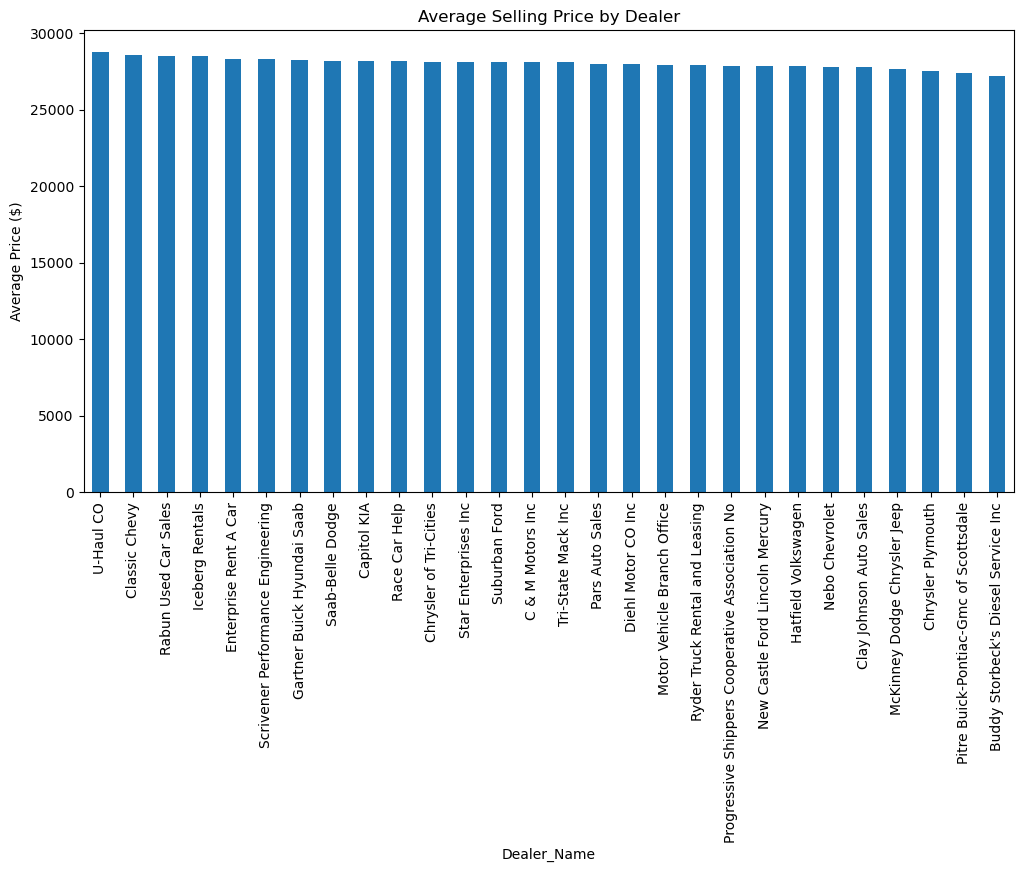

Car brand with the highest price variation: Lincoln
Price variation for each brand:
Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


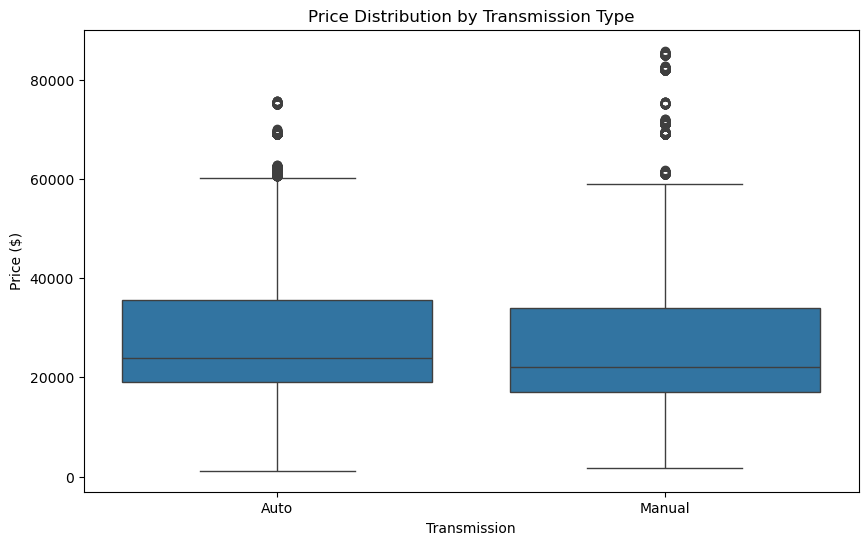

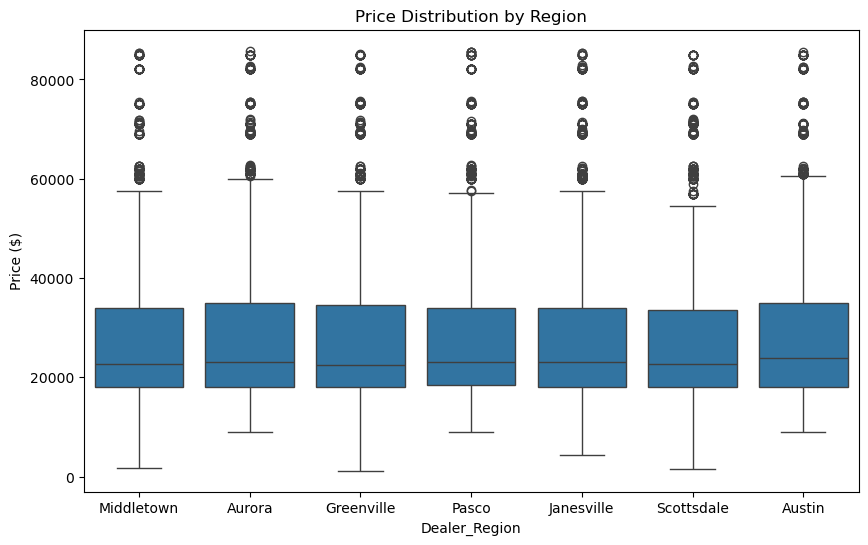

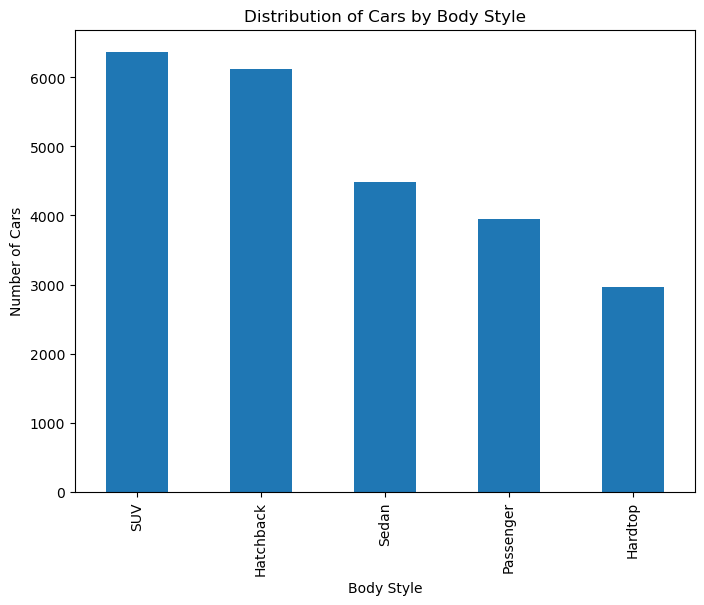

Average selling price by gender and income:
Gender  Annual Income          
Female  (-1109.92, 2248064.0]      28218.888484
        (2248064.0, 4486048.0]     30183.052980
        (4486048.0, 6724032.0]     28318.875000
        (6724032.0, 8962016.0]              NaN
        (8962016.0, 11200000.0]             NaN
Male    (-1109.92, 2248064.0]      27996.376891
        (2248064.0, 4486048.0]     29021.878710
        (4486048.0, 6724032.0]     27520.139535
        (6724032.0, 8962016.0]     40333.333333
        (8962016.0, 11200000.0]    26001.000000
Name: Price ($), dtype: float64


C:\Users\Harsh Arora\AppData\Local\Temp\ipykernel_30340\121043972.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_gender_income = df.groupby(['Gender', pd.cut(df['Annual Income'], bins=5)])['Price ($)'].mean()


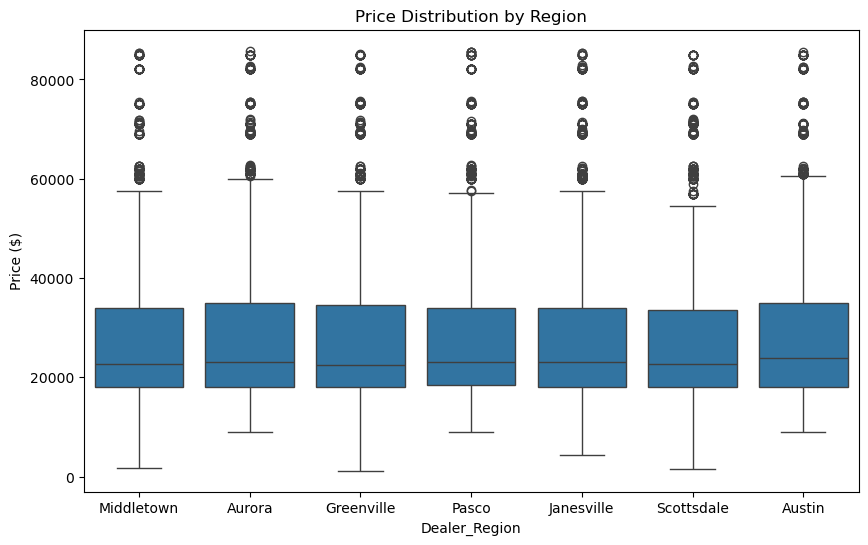

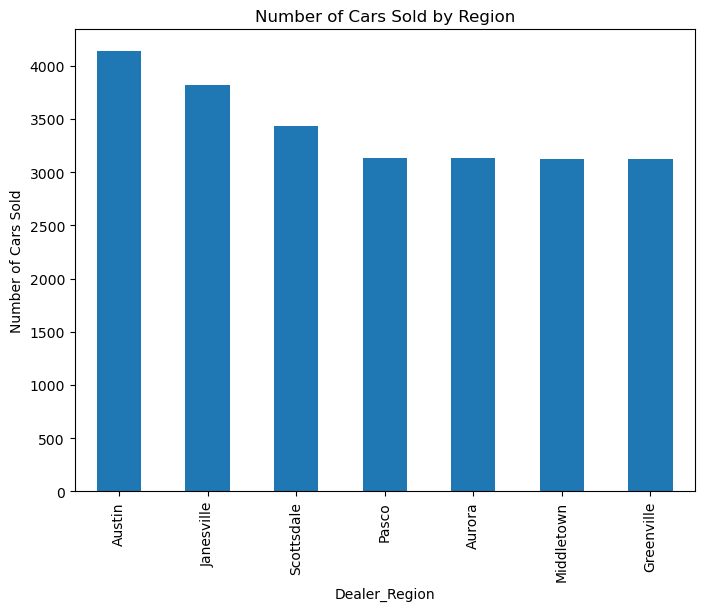

Average car price by engine size:
Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64
Average car price by income bracket:
Annual Income
(-1109.92, 2248064.0]      28044.351311
(2248064.0, 4486048.0]     29211.227862
(4486048.0, 6724032.0]     27736.745763
(6724032.0, 8962016.0]     40333.333333
(8962016.0, 11200000.0]    26001.000000
Name: Price ($), dtype: float64


C:\Users\Harsh Arora\AppData\Local\Temp\ipykernel_30340\121043972.py:71: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income_bracket = df.groupby(income_brackets)['Price ($)'].mean()


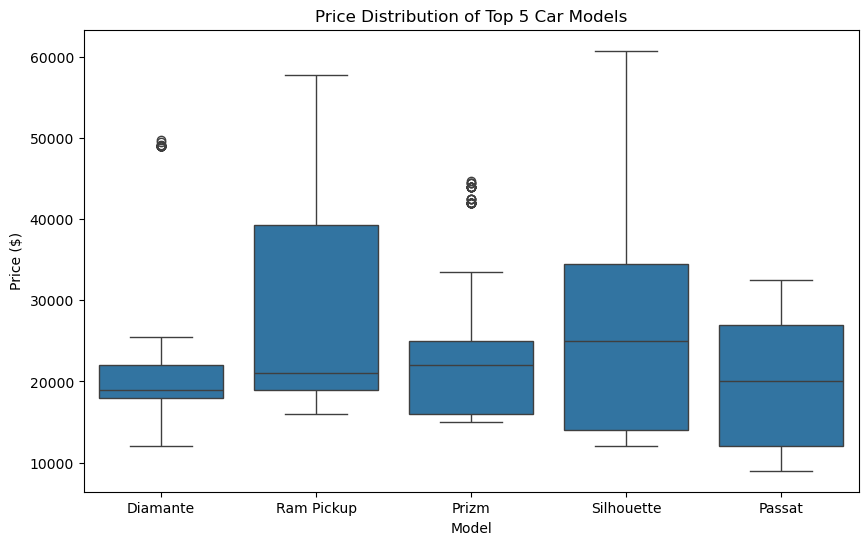

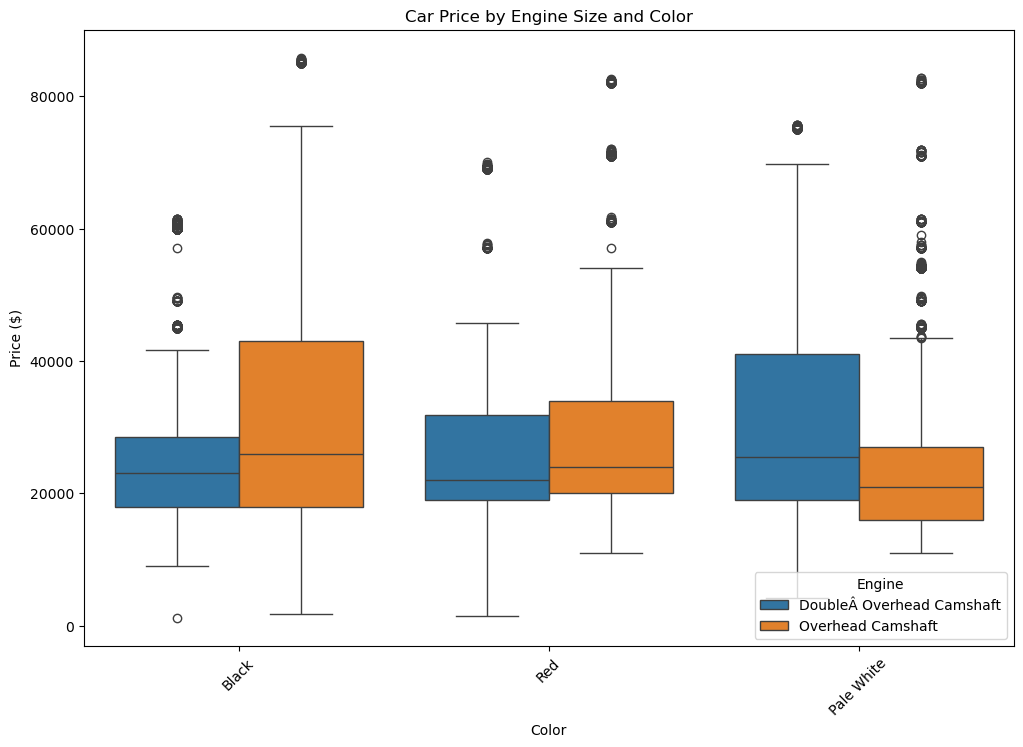

Colors with the highest price variation:
Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


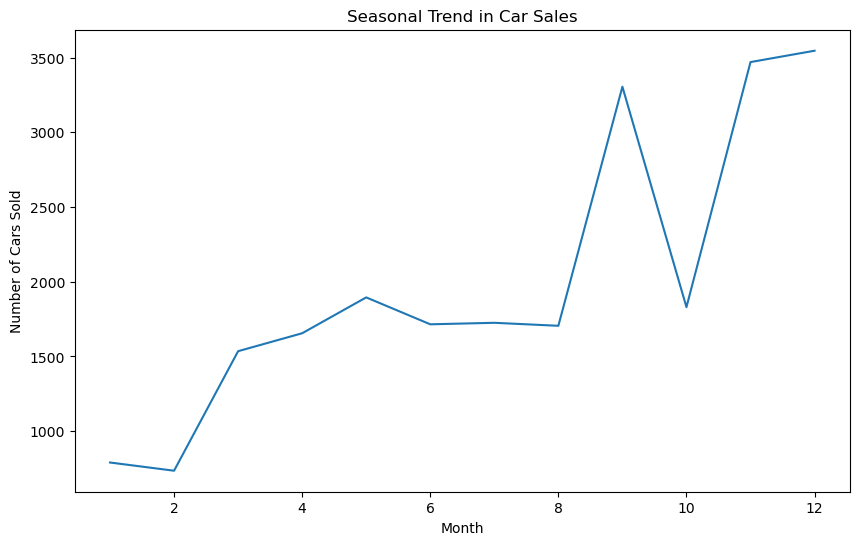

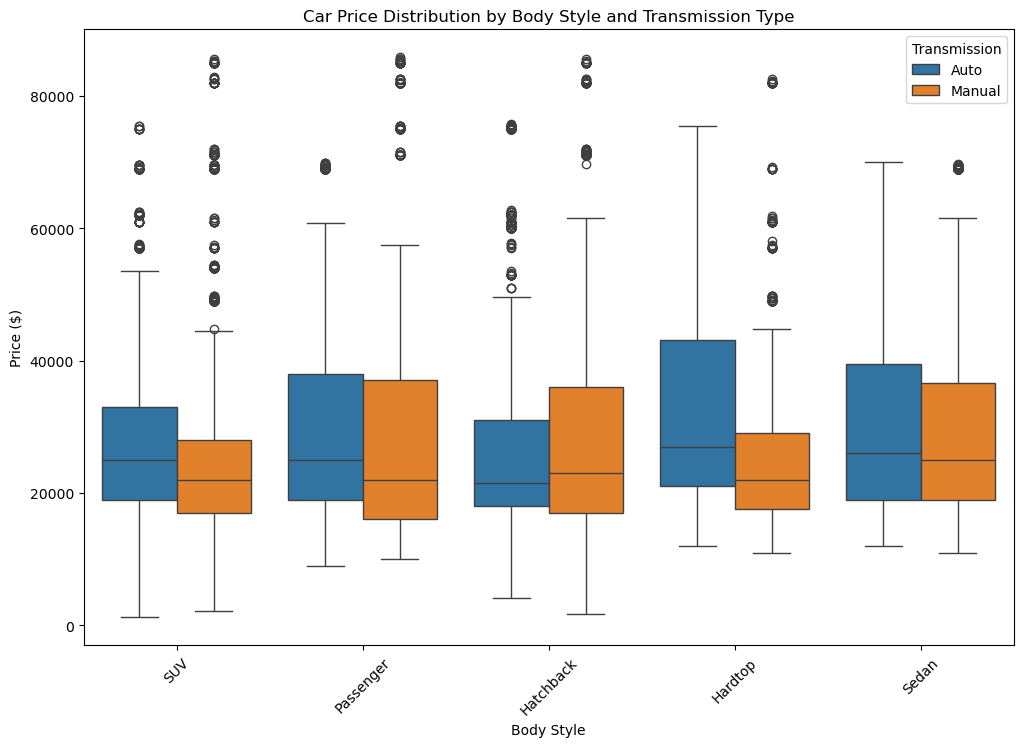

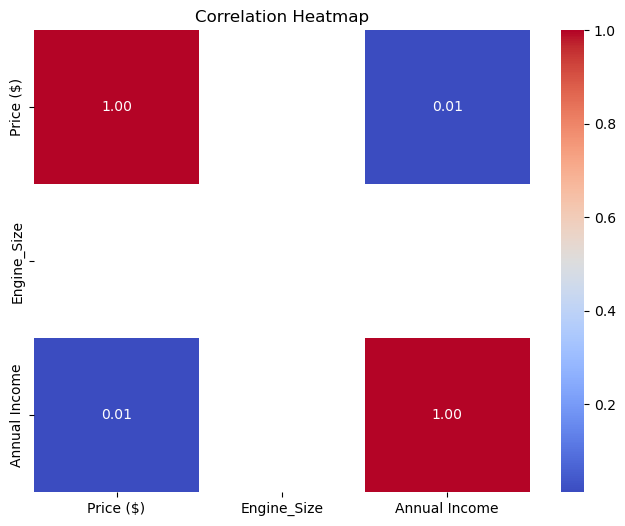

Average car price by model and engine type:
Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64


In [ ]:
##########################   EDA 2 ####################################

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "C:\\Users\\Harsh Arora\\Downloads\\Car Sale.csv"
df = pd.read_csv(file_path)

# 1. Average selling price of cars for each dealer and comparison across dealers
avg_price_per_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print("Average selling price per dealer:")
print(avg_price_per_dealer)
plt.figure(figsize=(12, 6))
avg_price_per_dealer.plot(kind='bar', title="Average Selling Price by Dealer")
plt.ylabel("Average Price ($)")
plt.show()

# 2. Car brand with the highest variation in prices
price_variation_by_company = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
highest_variation_brand = price_variation_by_company.idxmax()
print("Car brand with the highest price variation:", highest_variation_brand)
print("Price variation for each brand:")
print(price_variation_by_company)

# 3. Distribution of car prices for each transmission type and comparison of IQR
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Transmission', y='Price ($)')
plt.title("Price Distribution by Transmission Type")
plt.show()

# 4. Distribution of car prices across different regions
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
plt.title("Price Distribution by Region")
plt.show()

# 5. Distribution of cars based on body styles
body_style_distribution = df['Body Style'].value_counts()
plt.figure(figsize=(8, 6))
body_style_distribution.plot(kind='bar', title="Distribution of Cars by Body Style")
plt.ylabel("Number of Cars")
plt.show()

# 6. Average selling price by customer gender and annual income
avg_price_by_gender_income = df.groupby(['Gender', pd.cut(df['Annual Income'], bins=5)])['Price ($)'].mean()
print("Average selling price by gender and income:")
print(avg_price_by_gender_income)

# 7. Distribution of car prices and sales by region
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
plt.title("Price Distribution by Region")
plt.show()

region_sales = df['Dealer_Region'].value_counts()
plt.figure(figsize=(8, 6))
region_sales.plot(kind='bar', title="Number of Cars Sold by Region")
plt.ylabel("Number of Cars Sold")
plt.show()

# 8. Average car price by engine size
avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean()
print("Average car price by engine size:")
print(avg_price_by_engine)

# 9. Car prices by customer's annual income bracket
income_brackets = pd.cut(df['Annual Income'], bins=5)
avg_price_by_income_bracket = df.groupby(income_brackets)['Price ($)'].mean()
print("Average car price by income bracket:")
print(avg_price_by_income_bracket)

# 10. Top 5 car models with the highest number of sales and their price distribution
top_5_models = df['Model'].value_counts().head(5).index
top_5_data = df[df['Model'].isin(top_5_models)]
plt.figure(figsize=(10, 6))
sns.boxplot(data=top_5_data, x='Model', y='Price ($)')
plt.title("Price Distribution of Top 5 Car Models")
plt.show()

# 11. Car price vs. engine size across car colors and highest variation
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Color', y='Price ($)', hue='Engine')
plt.title("Car Price by Engine Size and Color")
plt.xticks(rotation=45)
plt.show()

price_variation_by_color = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("Colors with the highest price variation:")
print(price_variation_by_color)

# 12. Seasonal trend in car sales
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
sales_by_month = df['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='line', title="Seasonal Trend in Car Sales")
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.show()

# 13. Car price distribution by body style and transmission type
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission')
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.xticks(rotation=45)
plt.show()

# 14. Correlation between car price, engine size, and annual income
df['Engine_Size'] = df['Engine'].str.extract(r'(\d+)').astype(float)  # Convert engine size to numeric
corr_matrix = df[['Price ($)', 'Engine_Size', 'Annual Income']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# 15. Average car price by car model and engine type
avg_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean()
print("Average car price by model and engine type:")
print(avg_price_by_model_engine)


First 5 rows of the dataset:
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage  rating rating_count  \
0       ₹1,099                 64%     4.2       24,269   
1    

C:\Users\Harsh Arora\AppData\Local\Temp\ipykernel_30340\3904986635.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(0, inplace=True)  # Replace NaN with 0
C:\Users\Harsh Arora\AppData\Local\Temp\ipykernel_30340\3904986635.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='viridis')


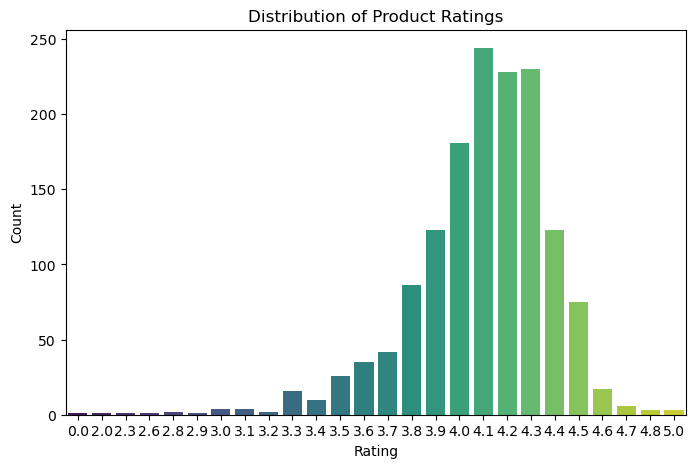

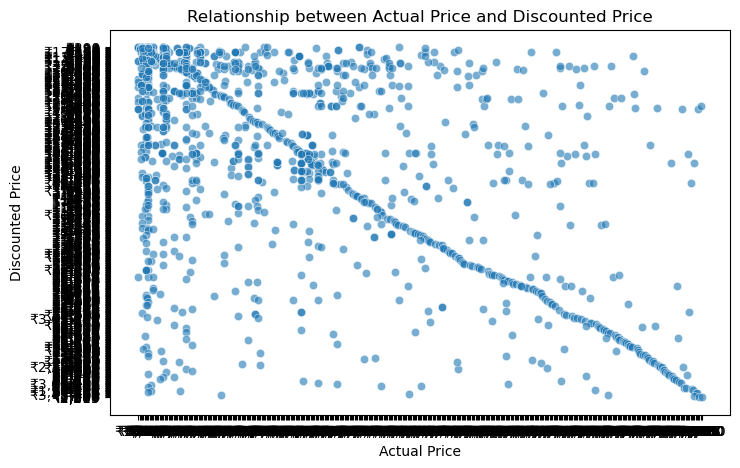


Top 5 Most Reviewed Products:
                                           product_name rating_count
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...          992
750        Eveready Red 1012 AAA Batteries - Pack of 10          989
977   Sennheiser CX 80S in-Ear Wired Headphones with...       98,250
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...          976
151   Zoul USB Type C Fast Charging 3A Nylon Braided...          974


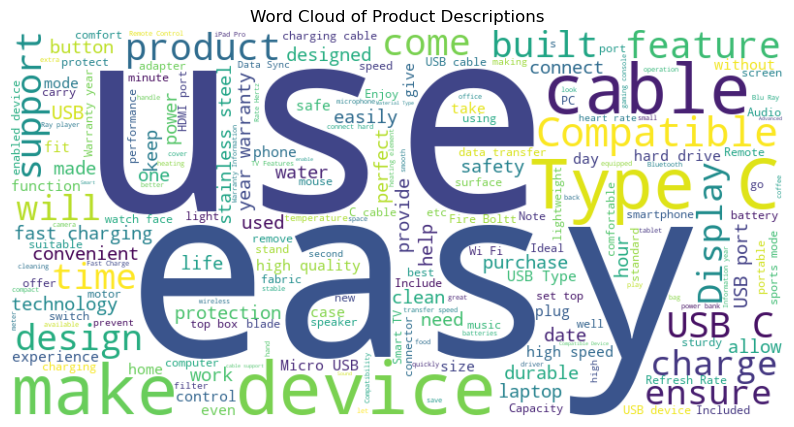


Details of the User Who Wrote the Most Reviews:
                                              user_id  \
23  AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...   

                                            user_name  
23  $@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...  


In [ ]:
########################## EDA 3 ############################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:\\Users\\Harsh Arora\\Downloads\\amazon.csv"
df = pd.read_csv(file_path)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating'].fillna(0, inplace=True)  # Replace NaN with 0


# the first five rows of the dataset to understand its structure.
print("First 5 rows of the dataset:")
print(df.head())

#summary of the dataset (columns, data types, missing values, etc.).
print("\nDataset Summary:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

#the top 5 categories with the highest number of products.
top_categories = df['category'].value_counts().head(5)
print("\nTop 5 Categories with the Most Products:")
print(top_categories)

# the average rating for products in each category and display the top 5.
avg_rating_by_category = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print("\nTop 5 Categories by Average Rating:")
print(avg_rating_by_category)

# the product with the highest discount percentage.
highest_discount_product = df.loc[df['discount_percentage'].idxmax()]
print("\nProduct with the Highest Discount Percentage:")
print(highest_discount_product[['product_name', 'discount_percentage']])

#the distribution of ratings.
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='rating', palette='viridis')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#the relationship between discounted_price and actual_price.
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='actual_price', y='discounted_price', alpha=0.6)
plt.title('Relationship between Actual Price and Discounted Price')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.show()

#the top 5 most reviewed products based on the number of reviews.
top_reviewed_products = df[['product_name', 'rating_count']].sort_values(by='rating_count', ascending=False).head(5)
print("\nTop 5 Most Reviewed Products:")
print(top_reviewed_products)

#a word cloud from the 'about_product' column to visualize the most common terms.
from wordcloud import WordCloud
text = ' '.join(df['about_product'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Product Descriptions')
plt.show()

#the user who wrote the maximum number of reviews and display their details.
top_reviewer = df['user_id'].value_counts().idxmax()
top_reviewer_data = df[df['user_id'] == top_reviewer]
print("\nDetails of the User Who Wrote the Most Reviews:")
print(top_reviewer_data[['user_id', 'user_name']].drop_duplicates())

Checking for null values:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Checking for duplicate rows:
Number of duplicate rows: 27


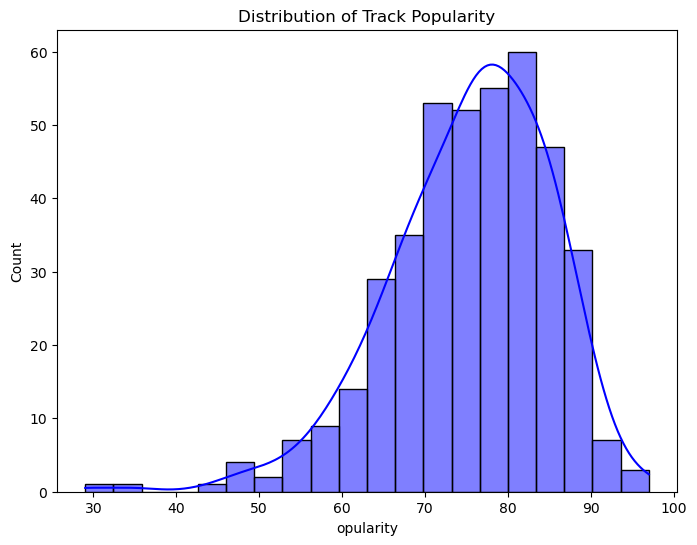

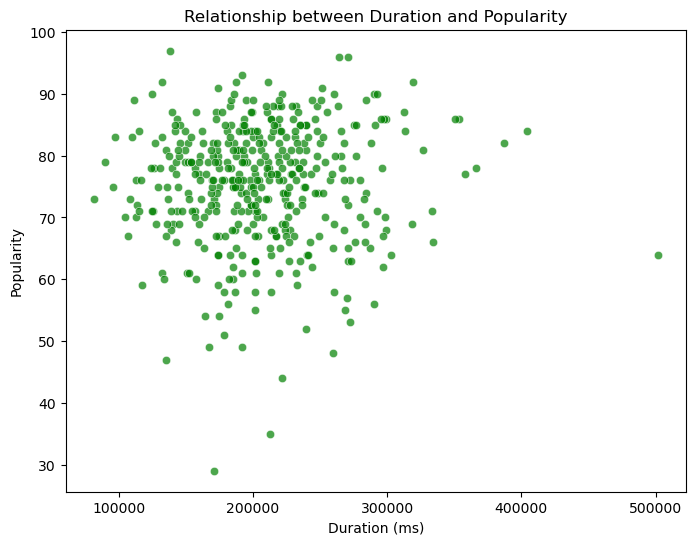


Artist with the highest number of tracks: Drake


C:\Users\Harsh Arora\AppData\Local\Temp\ipykernel_30340\1468274630.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Artist', order=artist_counts.head(10).index, palette='viridis')


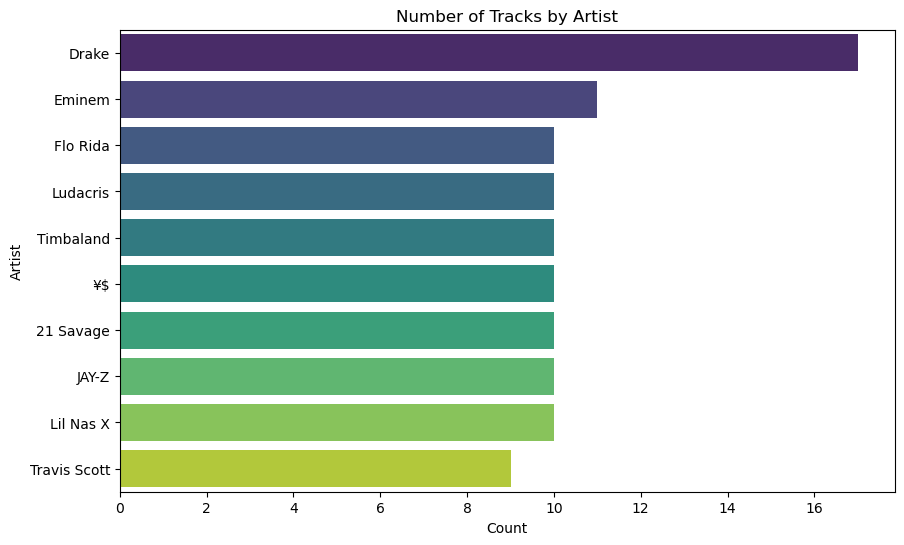


Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48

Average Popularity of the Top 5 Artists:
Artist
Drake        82.882353
Eminem       83.636364
Flo Rida     78.000000
Ludacris     63.000000
Timbaland    69.000000
Name: Popularity, dtype: float64

Most Popular Tracks for Top 5 Artists:
      Artist                               Track Name  Popularity
0      Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
1     Eminem                               Without Me          90
2   Flo Rida                       Low (feat. T-Pain)          84
3   Ludacris                             My Chick Bad          67
4  Timbaland              

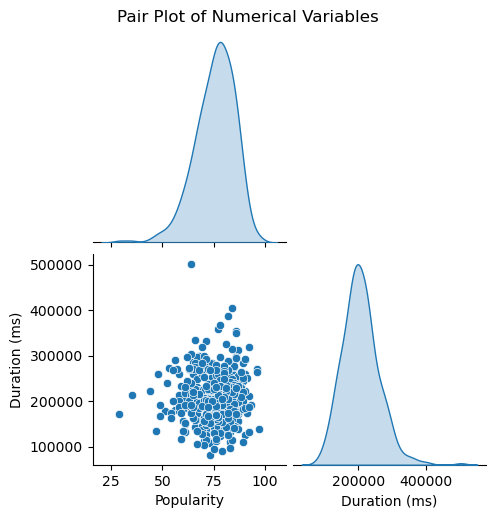

C:\Users\Harsh Arora\AppData\Local\Temp\ipykernel_30340\1468274630.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Artist'].isin(top_artists_by_tracks)], x='Artist', y='Duration (ms)', palette='Set3')


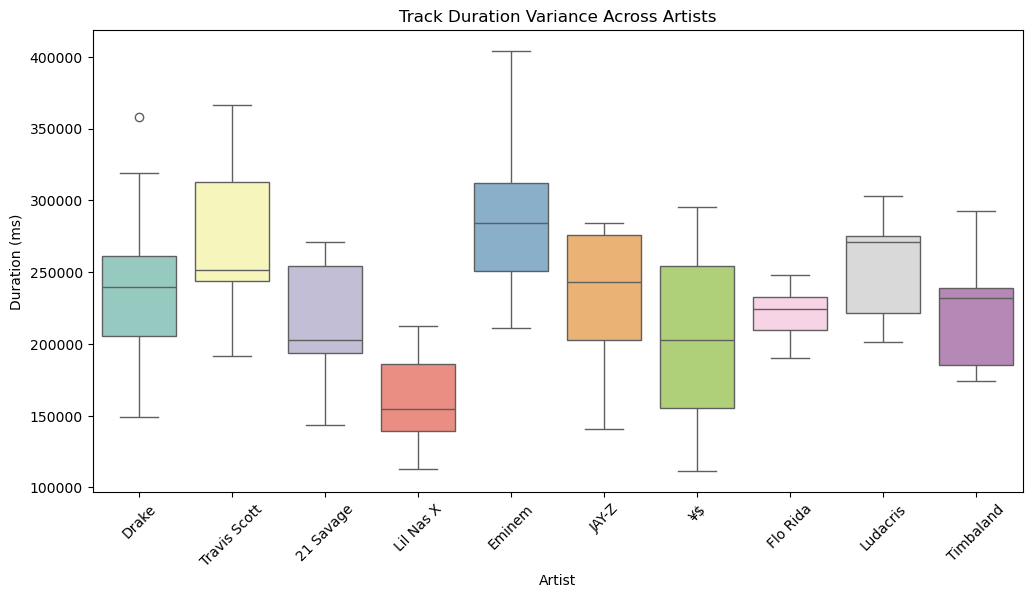

C:\Users\Harsh Arora\AppData\Local\Temp\ipykernel_30340\1468274630.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[df['Artist'].isin(top_artists_by_tracks)], x='Artist', y='Popularity', palette='Set2')


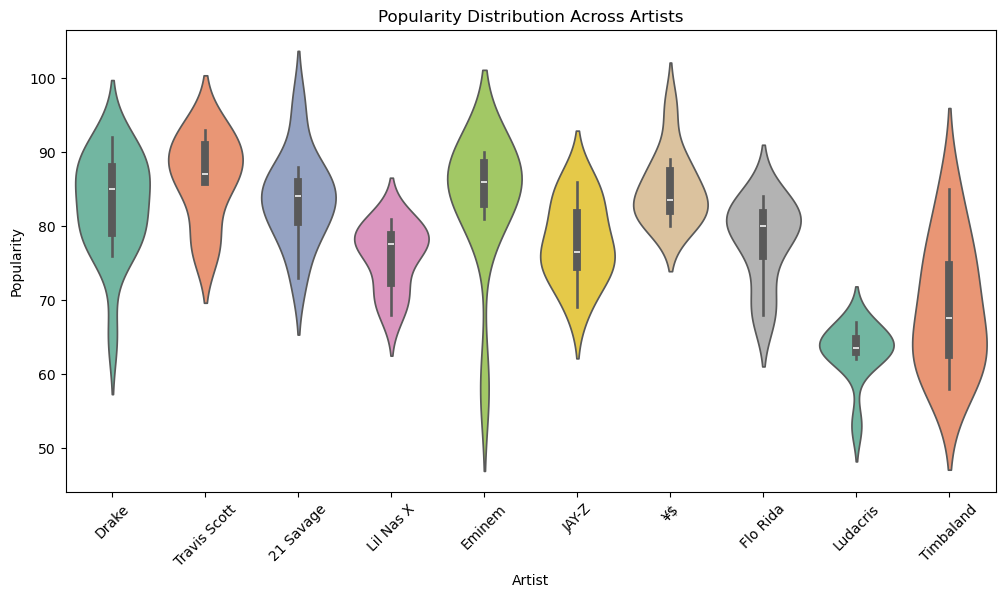

In [ ]:
######################################## EDA 4 #######################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:\\Users\\Harsh Arora\\Downloads\\spotify.csv"
df = pd.read_csv(file_path)

# Question 1: Check for null values and handle them
print("Checking for null values:")
print(df.isnull().sum())

# If null values are present, fill them or drop rows with nulls
df.dropna(inplace=True)

# Question 2: Check for duplicate rows and handle them
print("\nChecking for duplicate rows:")
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

# Question 3: Distribution of popularity among tracks (visualize with a histogram)
plt.figure(figsize=(8, 6))
sns.histplot(df['Popularity'], bins=20, kde=True, color='blue')
plt.title('Distribution of Track Popularity')
plt.xlabel('opularity')
plt.ylabel('Count')
plt.show()

# Question 4: Relationship between popularity and duration (scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity', alpha=0.7, color='green')
plt.title('Relationship between Duration and Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

# Question 5: Artist with the highest number of tracks
artist_counts = df['Artist'].value_counts()
top_artist = artist_counts.idxmax()
print(f"\nArtist with the highest number of tracks: {top_artist}")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Artist', order=artist_counts.head(10).index, palette='viridis')
plt.title('Number of Tracks by Artist')
plt.xlabel('Count')
plt.ylabel('Artist')
plt.show()

# Question 6: Top 5 least popular tracks
least_popular_tracks = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("\nTop 5 Least Popular Tracks:")
print(least_popular_tracks)

# Question 7: Average popularity of the top 5 most popular artists
top_5_artists = artist_counts.head(5).index
avg_popularity_by_artist = df[df['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean()
print("\nAverage Popularity of the Top 5 Artists:")
print(avg_popularity_by_artist)

# Question 8: Most popular tracks for the top 5 artists
most_popular_tracks = df[df['Artist'].isin(top_5_artists)].sort_values(['Artist', 'Popularity'], ascending=[True, False])
most_popular_tracks = most_popular_tracks.groupby('Artist').first().reset_index()
print("\nMost Popular Tracks for Top 5 Artists:")
print(most_popular_tracks[['Artist', 'Track Name', 'Popularity']])

# Question 9: Pair plot of numerical variables
sns.pairplot(df[['Popularity', 'Duration (ms)']], diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

# Question 10: Variance of track duration across artists (box plot)
plt.figure(figsize=(12, 6))
top_artists_by_tracks = df['Artist'].value_counts().head(10).index
sns.boxplot(data=df[df['Artist'].isin(top_artists_by_tracks)], x='Artist', y='Duration (ms)', palette='Set3')
plt.title('Track Duration Variance Across Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45)
plt.show()

# Question 11: Distribution of track popularity for different artists (violin plot)
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[df['Artist'].isin(top_artists_by_tracks)], x='Artist', y='Popularity', palette='Set2')
plt.title('Popularity Distribution Across Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()
